# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data
 Filled the saved the training, testing, validation data

In [1]:
# Load pickled data
import pickle

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print(X_train.shape)

(34799, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_valid = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))
n_classes_test = len(set(y_test))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
import numpy as np
import cv2
 
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged

Label =  12 : Priority road



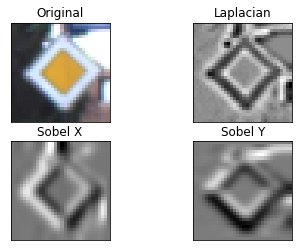

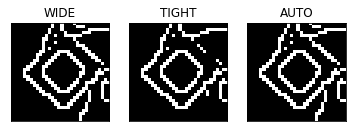

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import cv2
import random
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#Reading an ramdom "train" image
index = random.randint(0, len(X_train))
#Read the signs name
sign_names = []
with open('signnames.csv') as f:
    line = f.readline()
    for line in f.readlines():
        sign_names.append(line.split(',')[1])

#Let's try to print the label and corresponding sign name
print("Label = ",y_train[index], ":",sign_names[ y_train[index]])
img = X_train[index]

#Removing noise by applying a Gaussian blur and then convert the original image to grayscale
blur = cv2.GaussianBlur(img,(3,3),0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

#Applying Laplacian and Sobel filters to find Image gradients and edges
laplacian = cv2.Laplacian(gray,cv2.CV_64F)
sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)

#Displaying Laplacian and Sobel output images
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.savefig('./examples/grayscale_laplacian_sobel.png')
plt.show()

# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = cv2.Canny(blur, 10, 200)
tight = cv2.Canny(blur, 225, 250)
auto = auto_canny(blur)

# show the images
titles = ['WIDE','TIGHT','AUTO']
images = [ wide, tight, auto]
for i in range(0,3):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.savefig('./examples/canny_edge_dectection.png')
plt.show()


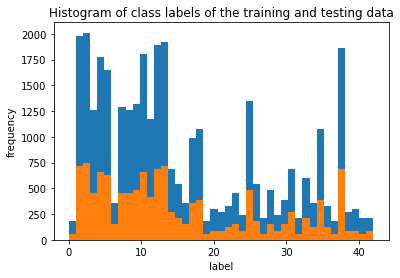

In [5]:
# Visualizing the train labels to see the distribution
plt.hist(y_train, bins=n_classes)
plt.hist(y_test, bins=n_classes_test)
plt.title("Histogram of class labels of the training and testing data")
plt.xlabel("label")
plt.ylabel("frequency")
plt.savefig('./examples/visualization.png')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
#Function to normalize list of images
def normalize(images):
    """
    Linear normalization
    """
    for arr in images:
        arr = arr.astype('float')
        # Do not touch the alpha channel
        for i in range(3):
            minval = arr[...,i].min()
            maxval = arr[...,i].max()
            if minval != maxval:
                arr[...,i] -= minval
                arr[...,i] *= (255.0/(maxval-minval))
                
    return images

In [7]:
#Function to randomly rotate certain percentage of the training images
def random_rotate(images, size):
    num = int(len(images)*(size))
    rows,cols = (32,32)
    for i in range(num):
        ind = random.randint(0, (len(images)-1))
        #randomly rotate between 5 to 25 degrees
        rotate = random.randint(5, 25)
        M = cv2.getRotationMatrix2D((cols/2,rows/2),rotate,1)
        images[ind] = cv2.warpAffine(images[ind],M,(cols,rows))   
    return images

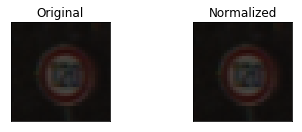

In [25]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import cv2
import random
import numpy as np
from scipy import ndimage
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

### Generate additional data and split the data into training/validation/testing sets here.
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train, y_train = shuffle(X_train, y_train)

#To randomly rotate 10% of X_train
X_train = random_rotate(X_train, 0.1)

#Reading an ramdom train image
index = random.randint(0, len(X_train))
original = X_train[index]

#Normalizing training and validation sets
X_train = normalize(X_train)
X_validation = normalize(X_validation)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

plt.subplot(2,2,1),plt.imshow(original)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(X_train[index])
plt.title('Normalized'), plt.xticks([]), plt.yticks([])
plt.savefig('./examples/normalized.png')
plt.show()

#Tried training the model with Grayscale/Lapacian images but accuracy was really bad so using colored images only.

### Model Architecture

In [9]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x, num_channels):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, num_channels, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
num_channels =  X_train.shape[3]
x = tf.placeholder(tf.float32, (None, 32, 32, num_channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x, num_channels)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [12]:
###Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [13]:
###Train the Model
#Run the training data through the training pipeline to train the model.
#Before each epoch, shuffle the training set.
#After each epoch, measure the loss and accuracy of the validation set.
#Save the model after training.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1),"Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, './traffic_sign_lenet')
    print("Model saved")
    
    # Run on test data
    testing_accuracy =  evaluate(X_test, y_test)
    print("Testing Accuracy = {:.3f}".format(testing_accuracy))
    # Run on additionnal validation data
    testing_accuracy =  evaluate(X_valid, y_valid)
    print("Additional Validation Accuracy = {:.3f}".format(testing_accuracy))

Training...

EPOCH 1 ... Validation Accuracy = 0.542
EPOCH 2 ... Validation Accuracy = 0.728
EPOCH 3 ... Validation Accuracy = 0.808
EPOCH 4 ... Validation Accuracy = 0.862
EPOCH 5 ... Validation Accuracy = 0.891
EPOCH 6 ... Validation Accuracy = 0.909
EPOCH 7 ... Validation Accuracy = 0.914
EPOCH 8 ... Validation Accuracy = 0.923
EPOCH 9 ... Validation Accuracy = 0.940
EPOCH 10 ... Validation Accuracy = 0.937
EPOCH 11 ... Validation Accuracy = 0.943
EPOCH 12 ... Validation Accuracy = 0.925
EPOCH 13 ... Validation Accuracy = 0.949
EPOCH 14 ... Validation Accuracy = 0.946
EPOCH 15 ... Validation Accuracy = 0.949
EPOCH 16 ... Validation Accuracy = 0.957
EPOCH 17 ... Validation Accuracy = 0.953
EPOCH 18 ... Validation Accuracy = 0.957
EPOCH 19 ... Validation Accuracy = 0.960
EPOCH 20 ... Validation Accuracy = 0.942
EPOCH 21 ... Validation Accuracy = 0.953
EPOCH 22 ... Validation Accuracy = 0.963
EPOCH 23 ... Validation Accuracy = 0.954
EPOCH 24 ... Validation Accuracy = 0.961
EPOCH 25 ...

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

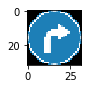

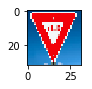

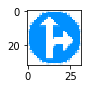

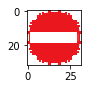

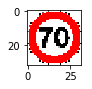

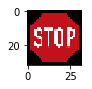

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg
from PIL import Image

file_names = ['Right_turn.png', 'Yield.png', 'Go_straight_or_right.png','No_entry.png', 'Speed70.png', 'Stop.png', ]
X_mytest = []
y_mytest = [33, 13, 36, 17, 4, 14]
size = 32, 32

for i in range(0, 6):
    file_path = "./examples/" + file_names[i]
    im = cv2.imread(file_path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = cv2.resize(im, (32,32))
    X_mytest.append(np.asarray(im, dtype=np.uint8))
    plt.figure(figsize=(1,1))
    plt.imshow(im)
    
#Normalizing new test images
X_mytest = normalize(X_mytest)

### Predict the Sign Type for Each Image

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    preditction = sess.run(tf.argmax(logits, 1), feed_dict={x: X_mytest})
    
    for i in range(0,6):
        print("Actual:"+ sign_names[y_mytest[i]] + "Predicted:" +sign_names[preditction[i]])

Actual:Turn right ahead
Predicted:Turn right ahead

Actual:Yield
Predicted:Yield

Actual:Go straight or right
Predicted:Go straight or right

Actual:No entry
Predicted:No entry

Actual:Speed limit (70km/h)
Predicted:Traffic signals

Actual:Stop
Predicted:Bicycles crossing



### Analyze Performance

In [23]:
### Calculate the accuracy for these 6 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
correct = 0.0
for i in range(0,6):
    if (y_mytest[i] == preditction[i]):
        correct+=1
print("Model Accuracy on Test Images =  {:.3f}".format((correct/len(y_mytest))*100),"%")

Model Accuracy on Test Images =  66.667 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [24]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
 
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmaxs = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 6), feed_dict={x: X_mytest})
    print(softmaxs)
    
    print("Actual indices")
    print(y_mytest)

TopKV2(values=array([[  1.00000000e+00,   1.77798043e-14,   6.96471655e-15,
          2.94119948e-26,   8.15652461e-33,   4.88477339e-33],
       [  9.99999762e-01,   2.16038529e-07,   4.53688343e-24,
          9.41721811e-27,   6.25184613e-32,   4.44997305e-35],
       [  9.99295354e-01,   7.04667124e-04,   5.38036439e-21,
          3.42422153e-22,   7.29762059e-25,   4.83967688e-30],
       [  1.00000000e+00,   1.78132504e-24,   3.78303734e-32,
          1.29097737e-34,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   3.11748375e-33,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  6.98877931e-01,   3.01034629e-01,   8.74867110e-05,
          1.90255867e-10,   8.82106481e-18,   1.55395218e-21]], dtype=float32), indices=array([[33, 26, 25, 23, 11,  7],
       [13, 14, 25, 10, 32,  5],
       [36, 26, 38, 33, 39, 34],
       [17, 14, 30, 38,  0,  1],
       [26, 29,  0,  1,  2,  3],
       [29, 14,  5,  3, 13, 22]]))
Actual indi

### Project Writeup

Please read my project writeup (https://github.com/girlcoderlucky/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup.md) as a guide. 